In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.options.plotting.backend = 'matplotlib'  # default, mas se quiser mudar, mude aqui. 'plotly', por exemplo

light_gray = '#747678'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

ALWAYS_FALSE = False  # uma constante apenas para substituição de comentários
if ALWAYS_FALSE:
    plt.rcParams['yaxis.labellocation'] = 'top'
    plt.rcParams['xaxis.labellocation'] = 'left'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


None

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
Alcohol,178.0,13.000618,0.811827,11.03,11.4408,11.933,12.3625,13.050,13.6775,14.100,14.4728,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,0.8977,1.247,1.6025,1.865,3.0825,3.983,5.5422,5.80
Ash,178.0,2.366517,0.274344,1.36,1.7000,2.000,2.2100,2.360,2.5575,2.700,2.9890,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,11.3540,16.000,17.2000,19.500,21.5000,24.000,28.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,78.0000,85.000,88.0000,98.000,107.0000,118.000,141.7600,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.1385,1.471,1.7425,2.355,2.8000,3.044,3.5959,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,0.4700,0.607,1.2050,2.135,2.8750,3.233,3.7914,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.1400,0.217,0.2700,0.340,0.4375,0.530,0.6300,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,0.4200,0.854,1.2500,1.555,1.9500,2.305,3.0336,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,1.8632,2.549,3.2200,4.690,6.2000,8.530,11.0185,13.00


,0,1,2,3,4
Alcohol,14.23,13.20,13.16,14.37,13.24
Malic_Acid,1.71,1.78,2.36,1.95,2.59
Ash,2.43,2.14,2.67,2.50,2.87
Ash_Alcanity,15.60,11.20,18.60,16.80,21.00
Magnesium,127.00,100.00,101.00,113.00,118.00
Total_Phenols,2.80,2.65,2.80,3.85,2.80
Flavanoids,3.06,2.76,3.24,3.49,2.69
Nonflavanoid_Phenols,0.28,0.26,0.30,0.24,0.39
Proanthocyanins,2.29,1.28,2.81,2.18,1.82
Color_Intensity,5.64,4.38,5.68,7.80,4.32


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

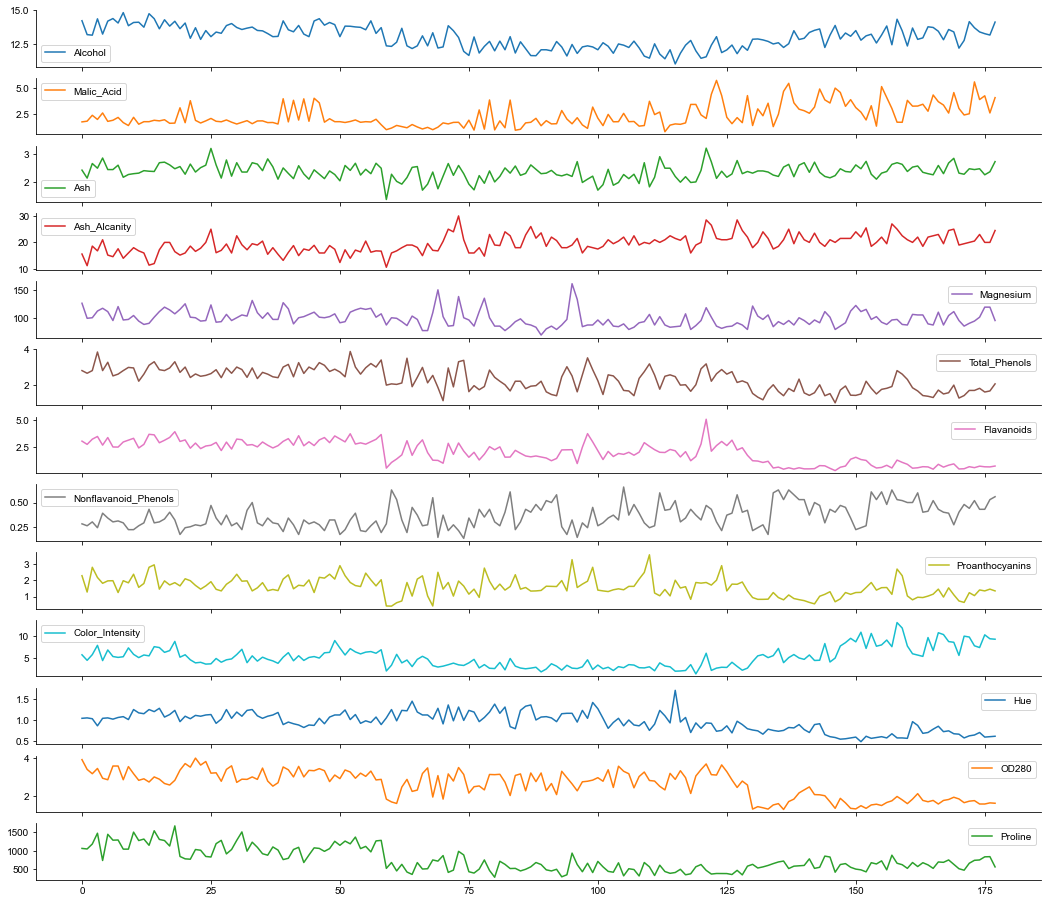

In [3]:
df = pd.read_csv('../../datasets/wine-clustering.csv')
display(df.info())
display(df.describe(percentiles=[.01, .1, .25, .5, .75, .9, .99]).T)
display(df.head().T)
df.plot(subplots=True, figsize=(18, 16))

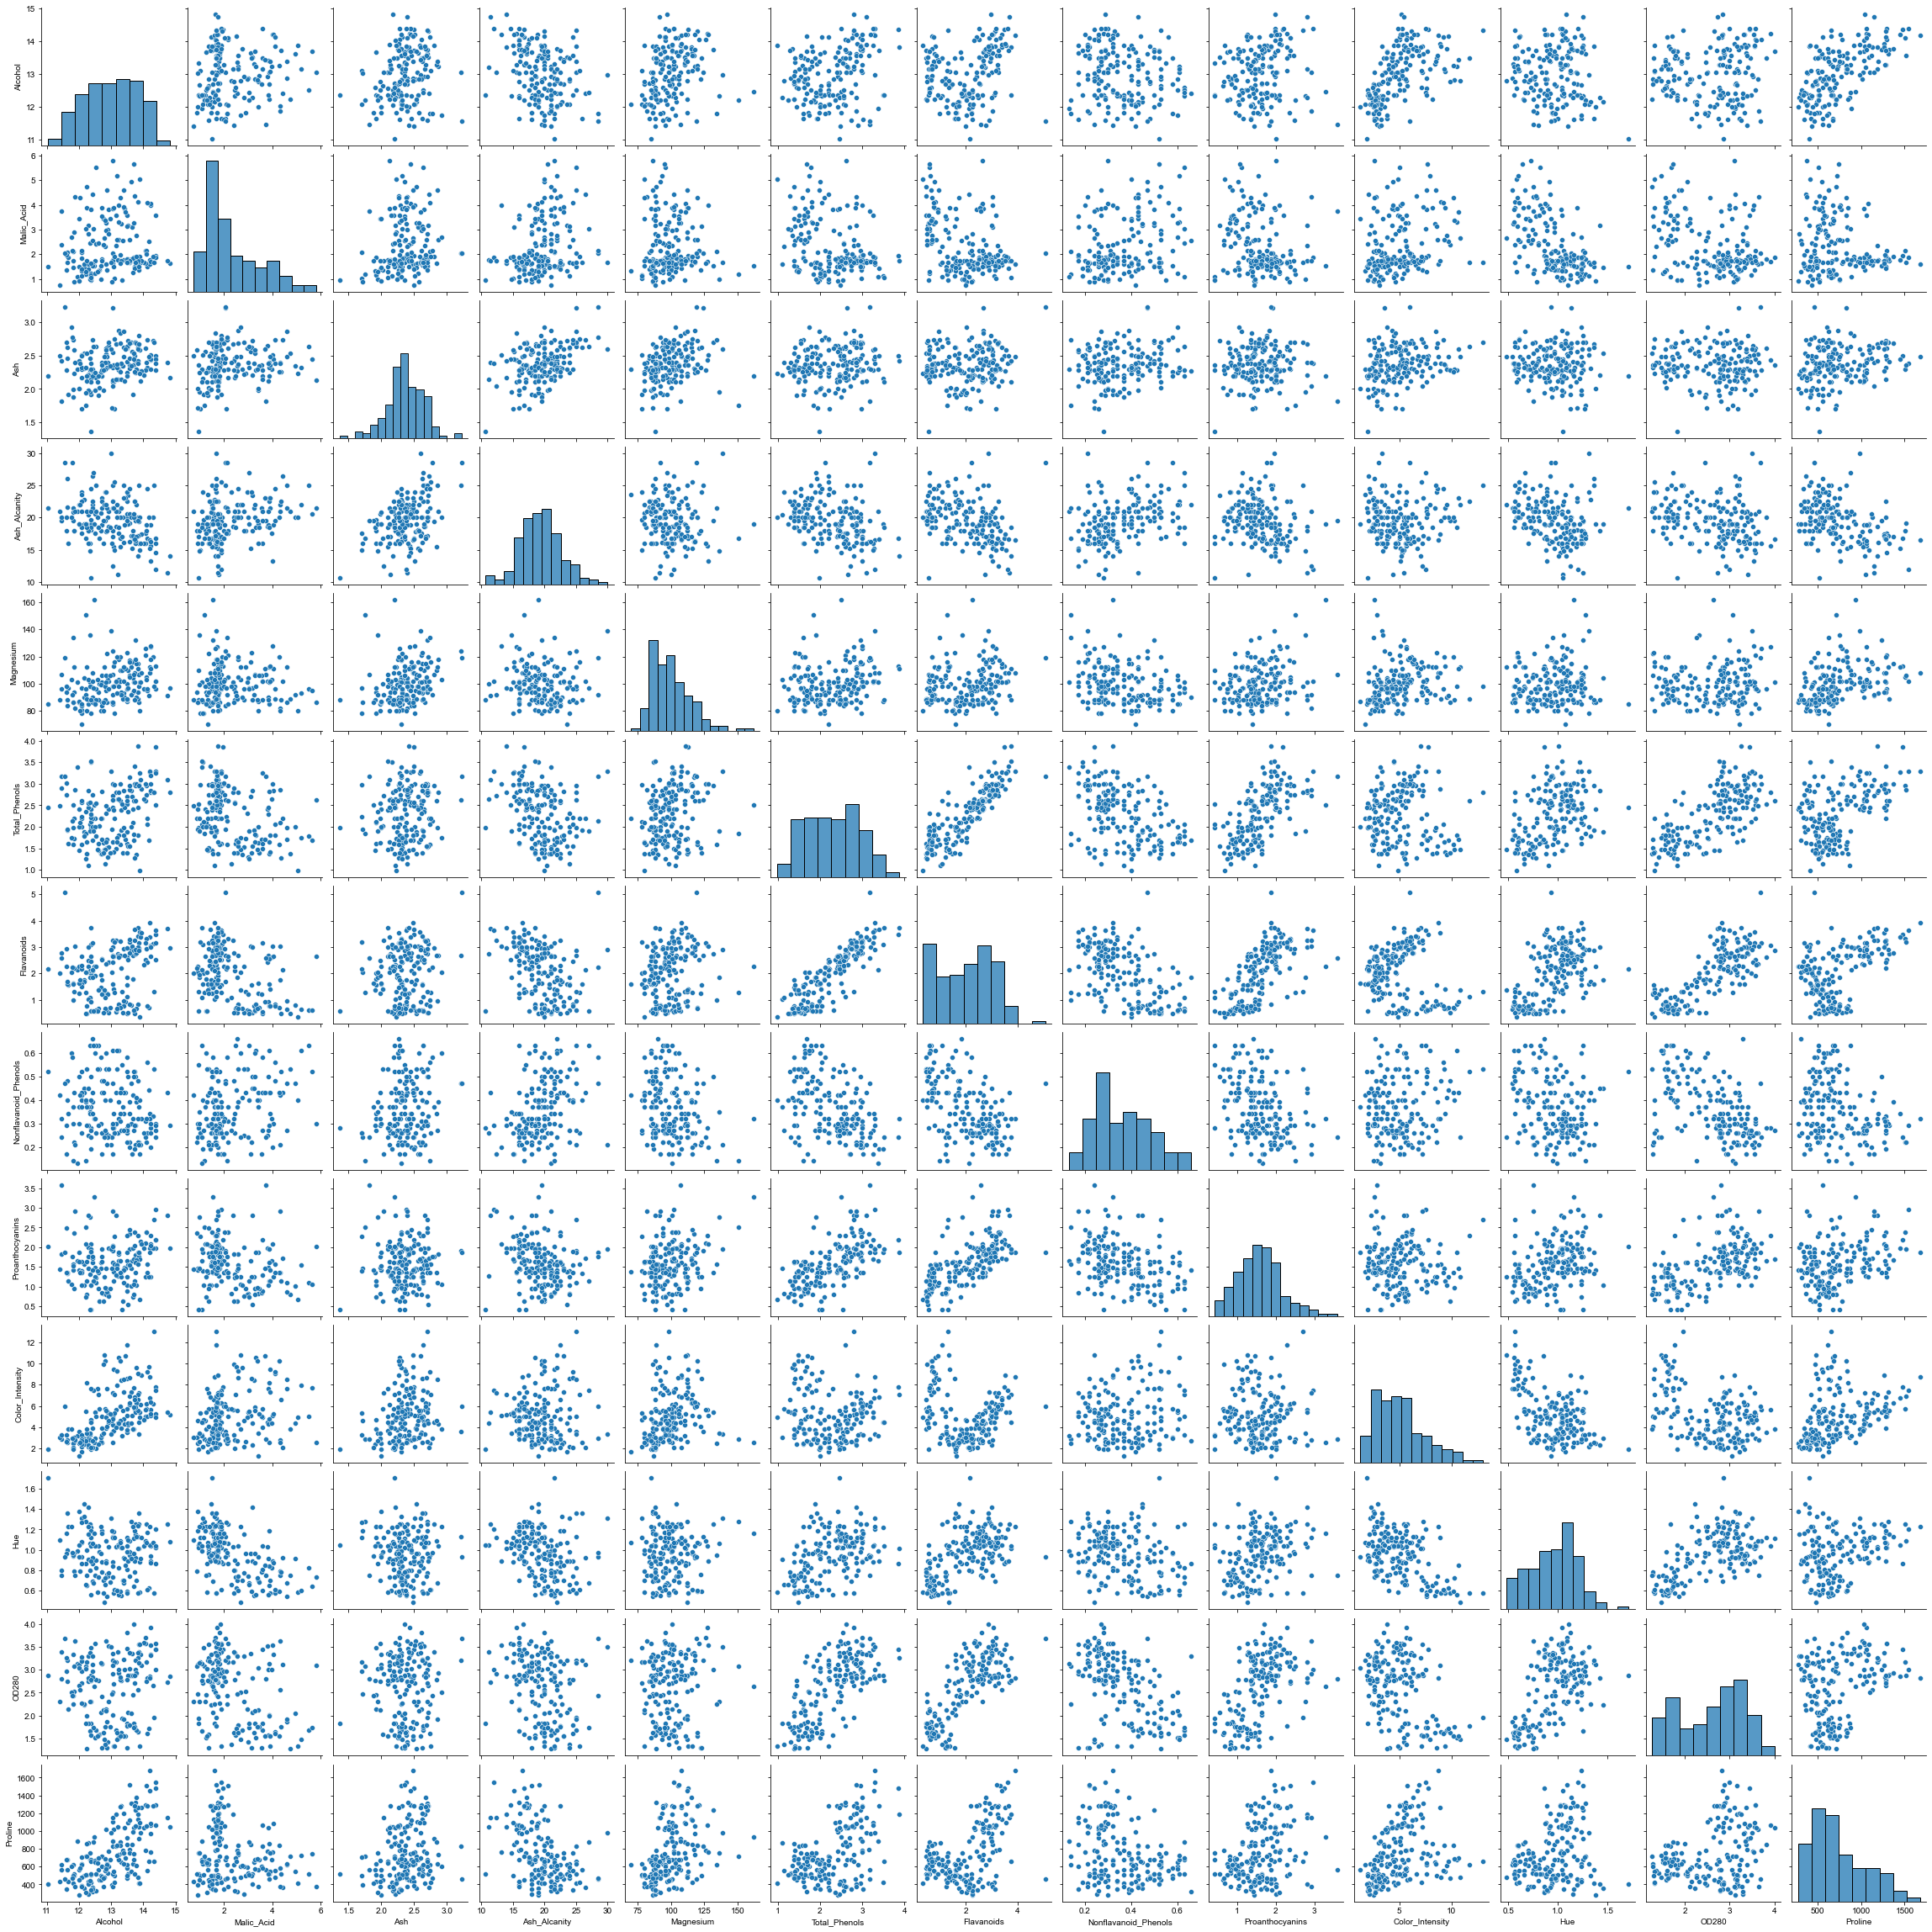

In [27]:
sns.pairplot(df)

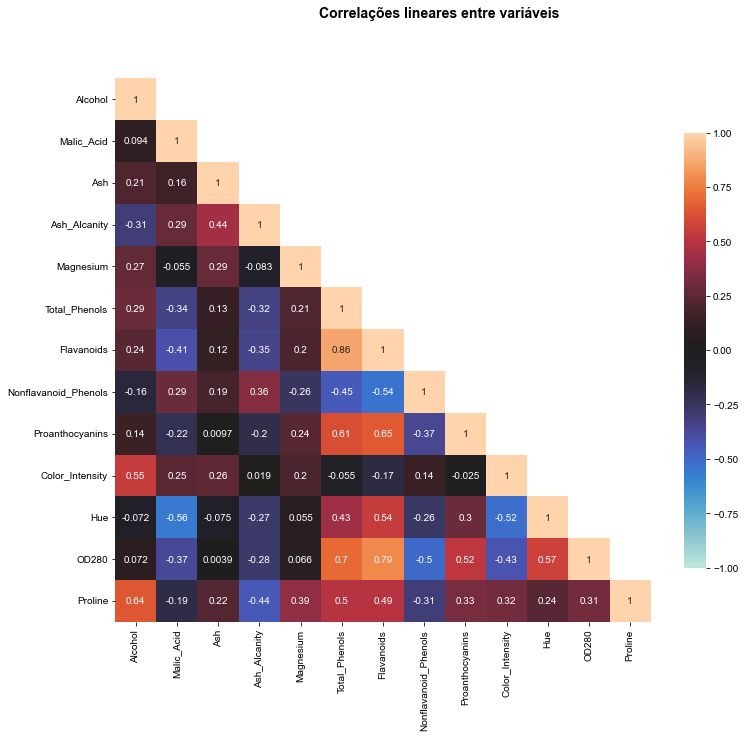

In [26]:
corr = df.corr(method='pearson')
mask = np.triu(corr, k=1).astype(bool)
fig, ax = plt.subplots()
sns.heatmap(corr, mask=mask,
            vmin=-1, vmax=1, center=0,
            ax=ax,
            annot=True, cbar_kws={'shrink': 0.8})
plt.suptitle(f"Correlações lineares entre variáveis", fontsize=14, fontweight='bold');